In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort0_query = """WITH
T2 AS (
    SELECT * FROM CINS_TMP_ALY_CUST_SAMPLE1_SUB3),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('31-05-2023', 'DD-MM-YY'))
SELECT * 
FROM T6"""

In [3]:
cohort0 = download_or_reload('data/COHORT_0', cohort0_query)

Len 494952


In [4]:
cohort0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494952 entries, 0 to 494951
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    494952 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     0 non-null       object        
 3   RPT_DT_LAG7     0 non-null       object        
 4   RPT_DT_LAG6     0 non-null       object        
 5   RPT_DT_LAG5     494934 non-null  datetime64[ns]
 6   RPT_DT_LAG4     494951 non-null  datetime64[ns]
 7   RPT_DT_LAG3     494951 non-null  datetime64[ns]
 8   RPT_DT_LAG2     494952 non-null  datetime64[ns]
 9   RPT_DT_LAG1     494952 non-null  datetime64[ns]
 10  RPT_DT          494952 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    494933 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    494918 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    494893 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    494879 non-null  dat

In [5]:
cohort0

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9
0,1#001079029946,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
1,1#001187010850,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
2,1#023094374,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
3,1#025988706,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,None,None
4,1#049178001840,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494947,9999478,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None
494948,9999482,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
494949,9999496,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None
494950,9999501,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,None,None


Filter Customer who not active in the previous month

In [6]:
cohort0['CUST_STT_LAG1'].value_counts()

2    255634
0    201950
1     37368
Name: CUST_STT_LAG1, dtype: int64

In [7]:
cohort0['CUST_STT'].value_counts()

2    255603
0    202107
1     37242
Name: CUST_STT, dtype: int64

In [8]:
cohort0 = cohort0[(cohort0['CUST_STT_LAG1']<2) | (cohort0['CUST_STT_LAG1'].isnull())]

In [9]:
cohort0

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9
0,1#001079029946,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
1,1#001187010850,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
2,1#023094374,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
3,1#025988706,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,None,None
4,1#049178001840,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494942,9999374,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
494944,9999443,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
494945,9999447,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
494948,9999482,None,None,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None


In [10]:
cohort0['CUST_STT'].value_counts(), cohort0['CUST_STT'].value_counts(normalize=True)

(0    202040
 1     36514
 2       764
 Name: CUST_STT, dtype: int64,
 0    0.844232
 1    0.152575
 2    0.003192
 Name: CUST_STT, dtype: float64)

In [11]:
score = []
for i, r in cohort0.iterrows():
    x = r[['CUST_STT', 'CUST_STT_LEAD1', 'CUST_STT_LEAD2', 'CUST_STT_LEAD3', 'CUST_STT_LEAD4', 'CUST_STT_LEAD5',
    'CUST_STT_LEAD6', 'CUST_STT_LEAD7', 'CUST_STT_LEAD8', 'CUST_STT_LEAD9']].values
    total_active = (x == 2).sum()
    score.append(total_active)
    

In [12]:
cohort0['SCORE'] = score

In [13]:
# shuffle to get random
# cohort0 = cohort0.sample(frac=1)

In [14]:
cohort0 = cohort0.sort_values(by='SCORE', ascending=False)

In [17]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

50000


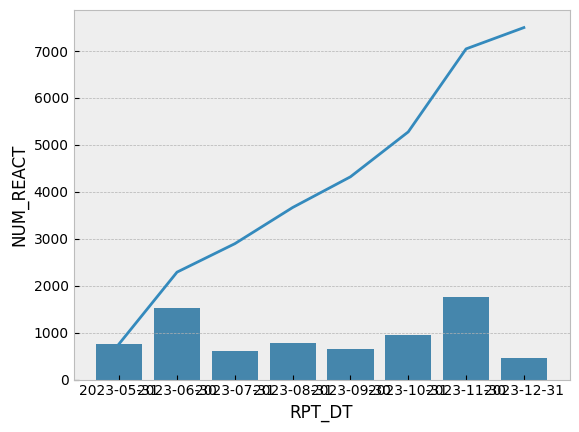

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-05-31,764,49236,NaN,764,0.01528
1,2023-06-30,1525,47711,0.030973,2289,0.04578
2,2023-07-31,606,47105,0.012701,2895,0.05790
3,2023-08-31,771,46334,0.016368,3666,0.07332
4,2023-09-30,654,45680,0.014115,4320,0.08640
5,2023-10-31,957,44723,0.020950,5277,0.10554
6,2023-11-30,1768,42955,0.039532,7045,0.14090
7,2023-12-31,454,42501,0.010569,7499,0.14998


100000


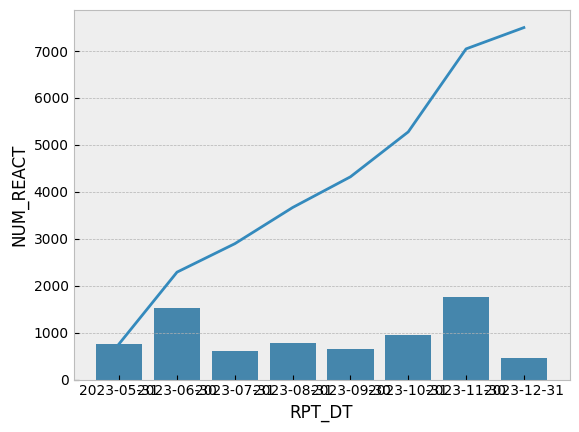

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-05-31,764,99236,NaN,764,0.00764
1,2023-06-30,1525,97711,0.015367,2289,0.02289
2,2023-07-31,606,97105,0.006202,2895,0.02895
3,2023-08-31,771,96334,0.007940,3666,0.03666
4,2023-09-30,654,95680,0.006789,4320,0.04320
5,2023-10-31,957,94723,0.010002,5277,0.05277
6,2023-11-30,1768,92955,0.018665,7045,0.07045
7,2023-12-31,454,92501,0.004884,7499,0.07499


200000


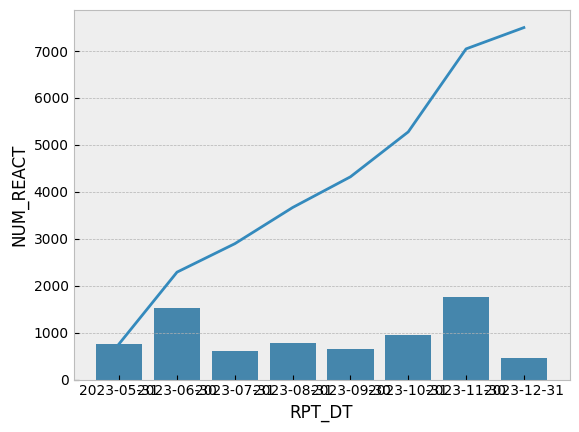

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-05-31,764,199236,NaN,764,0.003820
1,2023-06-30,1525,197711,0.007654,2289,0.011445
2,2023-07-31,606,197105,0.003065,2895,0.014475
3,2023-08-31,771,196334,0.003912,3666,0.018330
4,2023-09-30,654,195680,0.003331,4320,0.021600
5,2023-10-31,957,194723,0.004891,5277,0.026385
6,2023-11-30,1768,192955,0.009080,7045,0.035225
7,2023-12-31,454,192501,0.002353,7499,0.037495


300000


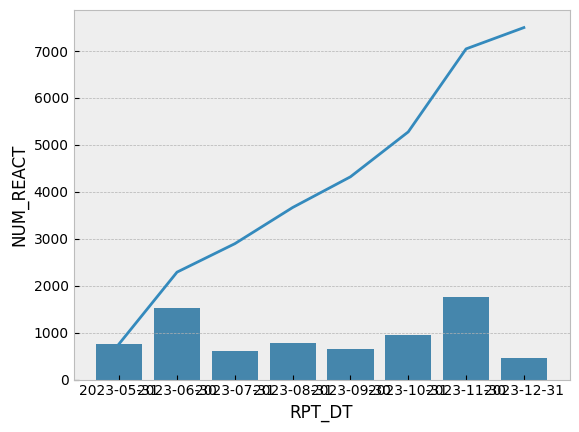

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-05-31,764,238554,NaN,764,0.003192
1,2023-06-30,1525,237029,0.006393,2289,0.009565
2,2023-07-31,606,236423,0.002557,2895,0.012097
3,2023-08-31,771,235652,0.003261,3666,0.015319
4,2023-09-30,654,234998,0.002775,4320,0.018051
5,2023-10-31,957,234041,0.004072,5277,0.022050
6,2023-11-30,1768,232273,0.007554,7045,0.029438
7,2023-12-31,454,231819,0.001955,7499,0.031335


500000


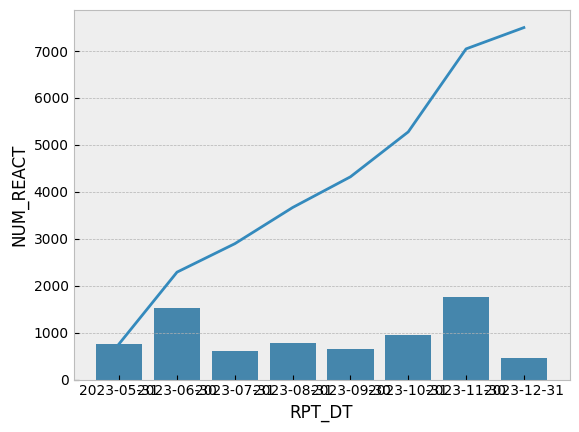

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-05-31,764,238554,NaN,764,0.003192
1,2023-06-30,1525,237029,0.006393,2289,0.009565
2,2023-07-31,606,236423,0.002557,2895,0.012097
3,2023-08-31,771,235652,0.003261,3666,0.015319
4,2023-09-30,654,234998,0.002775,4320,0.018051
5,2023-10-31,957,234041,0.004072,5277,0.022050
6,2023-11-30,1768,232273,0.007554,7045,0.029438
7,2023-12-31,454,231819,0.001955,7499,0.031335


In [18]:
for limit in [50000, 100000, 200000, 300000, 500000]:
    print(limit)
    res_df = analyze_cohort(cohort0[:limit])
    display(res_df)